## Regularization

Preliminary concepts

#### Likelihood
Definition.- The likelihood function is always defined as a function of the parameter ${\displaystyle \theta }  $ equal to (or sometimes proportional to) the density of the observed data with respect to a common or reference measure, for both discrete and continuous probability distributions. 

Discrete probability distribution: 
\begin{align*}
{\displaystyle {\mathcal {L}}(\theta \mid x)=p_{\theta }(x)=P_{\theta }(X=x)}
\end{align*}
Continuous probability distribution:
\begin{align*}
{\displaystyle {\mathcal {L}}(\theta \mid x)=f_{\theta }(x),\,}
\end{align*}

https://en.wikipedia.org/wiki/Likelihood_function

#### Bayes' Theorem
Bayes' theorem is stated mathematically as the following equation:
$${\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}},}$$
where ${\displaystyle A}$ and ${\displaystyle B}$ are events and $ {\displaystyle P(B)\neq 0} $.

* ${\displaystyle P(A\mid B)}$ is a conditional probability: the likelihood of event ${\displaystyle A}$ occurring given that ${\displaystyle B}$ is true.
* ${\displaystyle P(B\mid A)} $ is also a conditional probability: the likelihood of event ${\displaystyle B}$ occurring given that ${\displaystyle A}$ is true.
* ${\displaystyle P(A)}$ and ${\displaystyle P(B)}$ are the probabilities of observing ${\displaystyle A}$ and ${\displaystyle B}$ independently of each other; this is known as the marginal probability.

https://en.wikipedia.org/wiki/Bayes%27_theorem

### Process

Penalize large weights by adding their squared magnitude to the cost. The cost should be minimized so the square will penalize the values.

\begin{align*}
\hat{y}=w^Tx + b
\end{align*}

\begin{align*}
\hat{y}_i=w^Tx_i
\end{align*}

\begin{align*}
E &= \sum_{i=1}^N (y_i-\hat{y}_i)^2 = \sum_{i=1}^N (y_i-w^Tx_i)^2
\end{align*}

\begin{align*}
J &= \sum_{n=1}^N (y_n-\hat{y}_n)^2 + \lambda|w|^2
\end{align*}

\begin{align*}
|w|^2=w^Tw=w_1^2+w_2^2+...+w_D^2
\end{align*}

Written the function in full matrix form:

\begin{align*}
J &= (y-\hat{y})^T(y-\hat{y}) + \lambda w^T w
\end{align*}

\begin{align*}
J &= (y-Xw)^T(y-Xw) + \lambda w^Tw
\end{align*}

\begin{align*}
J &= y^Ty-2y^TXw+w^TX^TXw+\lambda w^Tw
\end{align*}

Derivate the function and equal to zero:

\begin{align*}
\frac{\partial J}{\partial w} &= -2X^Ty+2X^TXw+2\lambda w = 0
\end{align*}

Solve for w:

\begin{align*}
X^Ty &= w(X^TX+I\lambda)
\end{align*}

\begin{align*}
w &= (X^TX+I\lambda)^{-1}X^Ty
\end{align*}

#### Code the function

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

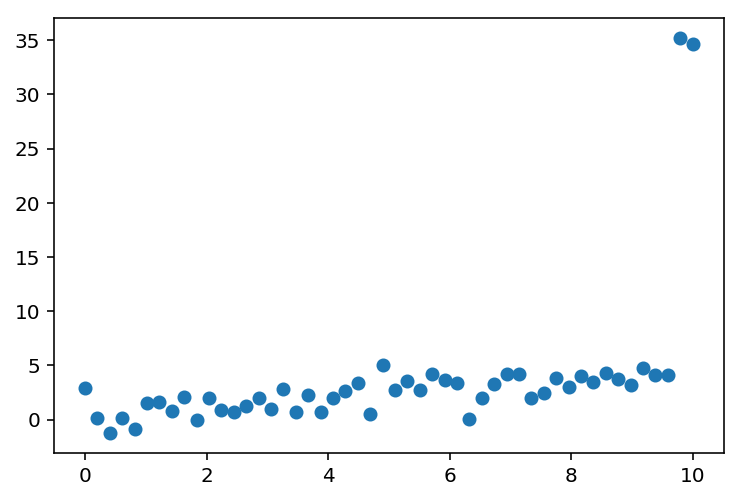

In [4]:
#Define the variables
N=50
X=np.linspace(0,10,N)
Y=0.5*X+np.random.randn(N)
Y[-1] += 30
Y[-2] += 30
%config InlineBackend.figure_format = 'retina'
plt.scatter(X,Y)
plt.show()

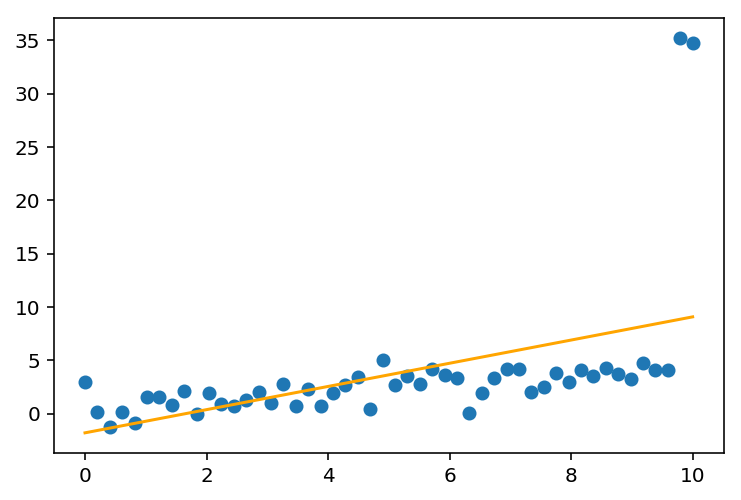

In [16]:
#Fill the column 0 with ones and the column 1 with the X values. To represent the independent term.
#X=np.vstack([np.ones(N),X]).T
#Solve the non-regularized equation
w_ml = np.linalg.solve(X.T.dot(X),X.T.dot(Y))
Yhat_ml = X.dot(w_ml)
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],Yhat_ml,color='orange')
plt.show()

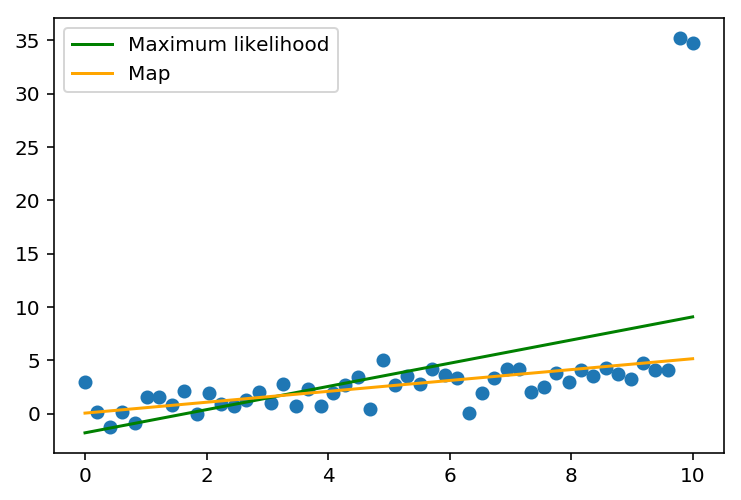

In [25]:
#Do the l2 regularization
l2=1000.0
#np.eye is to create a ones diagonal matrix. The 2x2 identity matrix.
w_map=np.linalg.solve(l2*np.eye(2)+X.T.dot(X),X.T.dot(Y))
Yhat_map=X.dot(w_map)
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],Yhat_ml,label='Maximum likelihood',color='green')
plt.plot(X[:,1],Yhat_map,label='Map',color='orange')
plt.legend()
plt.show()